In [ ]:
from torchvision import models
from PIL import Image
import torchvision.transforms as T 
import matplotlib.pyplot as plt
import torch
import numpy as np
from imageio import imread
from skimage.color import rgb2gray, gray2rgb
import cv2

In [2]:
def decode_segmap(image,objects,nc=21):        
    r = np.zeros_like(image).astype(np.uint8)
    for l in objects:
        idx = image == l
        r[idx] = 255 #fill  r with 255 wherever class is 1 and so on
    return np.array(r)

In [3]:
def remove_patch_og(real_img,mask):
    og_data = real_img.copy()
    idx = mask == 255  ### cutting out mask part from real image here
    og_data[idx] =255
    return og_data

In [4]:
objects = [3, 15]

In [5]:
input_image = "Images/Inputs/9.jpg"
img = Image.open(input_image)

In [6]:
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

In [7]:
#net=fcn
net=dlab

In [8]:
trf = T.Compose([T.Resize(680), T.ToTensor(), T.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])])
print(trf)

Compose(
    Resize(size=680, interpolation=bilinear)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


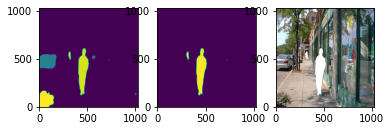

In [9]:
inp = trf(img).unsqueeze(0).to("cpu")
out = net.to("cpu")(inp)['out']
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
mask=decode_segmap(om,objects)

height,width =mask.shape
img=np.array(img.resize((width, height), Image.ANTIALIAS))

og_img=remove_patch_og(img,mask)
img_seg = Image.fromarray(og_img)

#cv2.write("Images/img/seg.jpg", om)

plt.subplot(1,3,1)
plt.imshow(om, extent =[0, 1024, 0, 1024])
plt.subplot(1,3,2)
plt.imshow(mask, extent =[0, 1024, 0, 1024])
plt.subplot(1,3,3)
plt.imshow(og_img, extent =[0, 1024, 0, 1024])
plt.show()